<a href="https://colab.research.google.com/github/roshniiyyani/dataspy/blob/master/ipldataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [ ]:
df=pd.read_csv('/content/deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


david warner performance analysis


In [ ]:
filt=df['batsman']=='DA Warner'
df_warner=df[filt]
df_warner.shape

NameError: ignored

In [ ]:
df_warner['dismissal_kind'].value_counts().plot.pie()

NameError: ignored

In [ ]:
len(df_warner[df_warner['batsman_runs']==4])

301

In [ ]:
len(df_warner[df_warner['batsman_runs']==6])

123

defining a function count

In [ ]:
def count(df,runs):
  len(df_warner[df_warner['batsman_runs']==runs])**runs


([<matplotlib.patches.Wedge at 0x7faa043bf350>,
 [Text(0.7817643705069365, 0.7738504177203069, '1'),
  Text(-0.33959111687520577, 1.0462685474291247, '2'),
  Text(-0.6816960876596443, 0.863302058418451, '3'),
  Text(-1.1128316125234867, -0.44900534759440974, '4'),
  Text(0.8038429148449225, -0.750890516822272, '5')],
 [Text(0.4264169293674199, 0.4221002278474401, '24.8&&'),
  Text(-0.18523151829556675, 0.5706919349613407, '10.3&&'),
  Text(-0.3718342296325332, 0.4708920318646096, '1.0&&'),
  Text(-0.6491517739720338, -0.261919786096739, '40.0&&'),
  Text(0.4384597717335941, -0.4095766455394211, '23.9&&')])

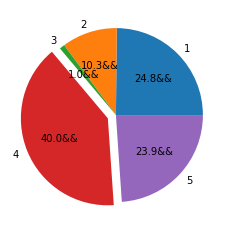

In [ ]:
slices=[997,414,39,1604,960]
labels=[1,2,3,4,5]
explode=[0,0,0,0.1,0]
plt.pie(slices,labels=labels,autopct='%1.1f&&',explode=explode)

In [ ]:
df=pd.read_csv('/content/deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [ ]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', nan], dtype=object)

In [ ]:
Teams={'Royal Challengers Bangalore':RCB,'Sunrisers Hyderabad':SRH,
       'Rising Pune Supergiant':RPS, 'Mumbai Indians': MI,
       'Kolkata Knight Riders':KKR, 'Gujarat Lions':GL, 'Kings XI Punjab':KXIP,
       'Delhi Daredevils':DD, 'Chennai Super Kings':CSK, 'Rajasthan Royals':RR,
       'Deccan Chargers':DC}

NameError: ignored

In [ ]:
df['batting_team']=df['batting_team'].map(Teams)
df['bowling_team']=df['bowling_team'].map(Teams)

NameError: ignored

In [ ]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [ ]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
runs=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)
runs

,inning,batting_team,total_runs
0,1.0,Sunrisers Hyderabad,207.0
1,2.0,Royal Challengers Bangalore,172.0
2,1.0,Mumbai Indians,184.0
3,2.0,Rising Pune Supergiant,187.0
4,1.0,Gujarat Lions,183.0
...,...,...,...
347,2.0,Deccan Chargers,154.0
348,1.0,Chennai Super Kings,146.0
349,2.0,Royal Challengers Bangalore,149.0
350,1.0,Deccan Chargers,143.0


In [ ]:
inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]

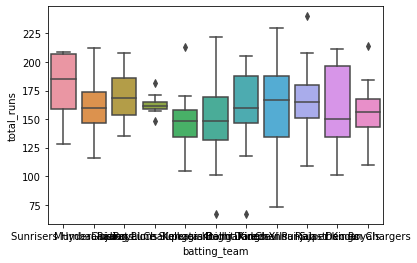

In [ ]:
sns.boxplot(x='batting_team',y='total_runs',data=inning1)

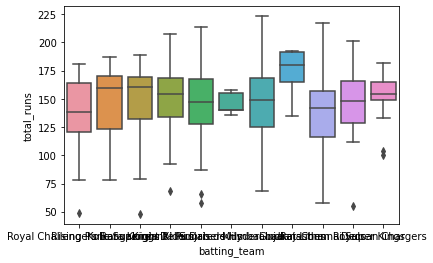

In [ ]:
sns.boxplot(x='batting_team',y='total_runs',data=inning2)

In [ ]:
high_scores=df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,207.0
1,1,2.0,Royal Challengers Bangalore,Sunrisers Hyderabad,172.0
2,2,1.0,Mumbai Indians,Rising Pune Supergiant,184.0
3,2,2.0,Rising Pune Supergiant,Mumbai Indians,187.0
4,3,1.0,Gujarat Lions,Kolkata Knight Riders,183.0
...,...,...,...,...,...
347,172,2.0,Deccan Chargers,Delhi Daredevils,154.0
348,173,1.0,Chennai Super Kings,Royal Challengers Bangalore,146.0
349,173,2.0,Royal Challengers Bangalore,Chennai Super Kings,149.0
350,174,1.0,Deccan Chargers,Royal Challengers Bangalore,143.0


In [ ]:
scores_200=high_scores[high_scores['total_runs']>=200]
scores_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,207.0
16,9,1.0,Delhi Daredevils,Rising Pune Supergiant,205.0
38,20,1.0,Royal Challengers Bangalore,Gujarat Lions,213.0
62,32,1.0,Sunrisers Hyderabad,Kings XI Punjab,207.0
72,36,1.0,Sunrisers Hyderabad,Kolkata Knight Riders,209.0
82,41,1.0,Gujarat Lions,Delhi Daredevils,208.0
83,41,2.0,Delhi Daredevils,Gujarat Lions,214.0
88,44,1.0,Mumbai Indians,Delhi Daredevils,212.0
100,50,1.0,Kings XI Punjab,Mumbai Indians,230.0
101,50,2.0,Mumbai Indians,Kings XI Punjab,223.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


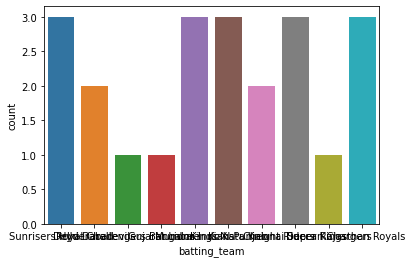

In [ ]:
sns.countplot(scores_200['batting_team'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


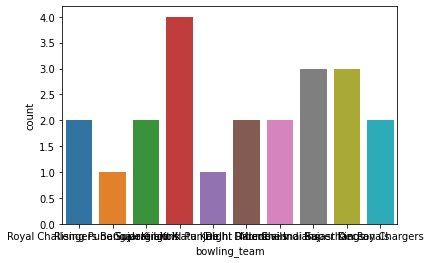

In [ ]:
sns.countplot(scores_200['bowling_team'])